# Thesis Analysis on TA35 
> Here Ill use some strategy to analyze the the TA35 stocks and compare Buy and hold to arima pridiction 

> Prototype for Final project Master's degree yeshurun BA

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp thesis_ta35

In [ ]:
#| export

from buy_and_hold_vs_arima.arima_stats import create_auto_arima_prediction_future_2
from buy_and_hold_vs_arima.arima_stats import create_dataframe_with_series
from buy_and_hold_vs_arima.arima_stats import top_score
from buy_and_hold_vs_arima.arima_stats import get_top_players
from buy_and_hold_vs_arima.arima_stats import create_dataframe
import buy_and_hold_vs_arima
import yfinance as yf
import pandas as pd 
import numpy as np 

[*********************100%%**********************]  1 of 1 completed


<Axes: >

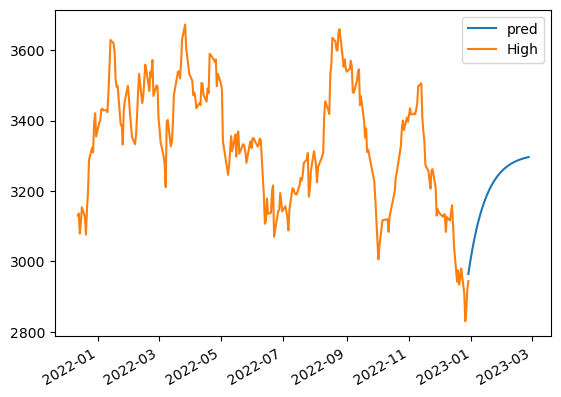

In [ ]:
# examples ! on how to use an arima model 
series_data = yf.download('LUMI.TA', start='2021-12-10', end='2022-12-30')
df = create_dataframe_with_series(create_auto_arima_prediction_future_2 , series_data['High'])
df.plot()

[*********************100%%**********************]  1 of 1 completed


<Axes: >

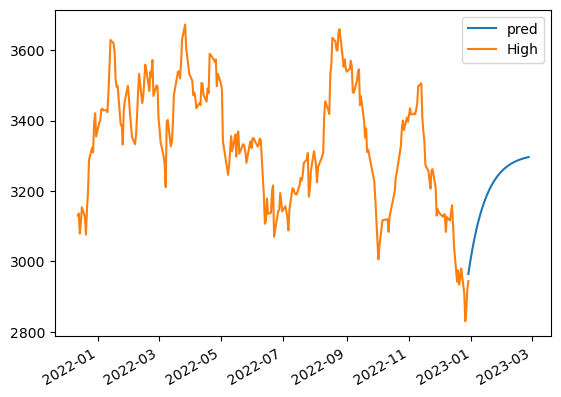

In [ ]:
# examples ! on how to use an arima model 
series_data = yf.download('LUMI.TA', start='2021-12-10', end='2022-12-30')
df = create_dataframe_with_series(create_auto_arima_prediction_future_2 , series_data['High'])
df.plot()

In [ ]:
df[-70:-50]

,pred,High
2022-12-18,NaN,2942.0
2022-12-19,NaN,2975.0
2022-12-20,NaN,2934.0
2022-12-21,NaN,2952.0
2022-12-22,NaN,2980.0
2022-12-25,NaN,2909.0
2022-12-26,NaN,2830.0
2022-12-27,NaN,2864.0
2022-12-28,NaN,2920.0
2022-12-29,NaN,2944.0


## Creating the TA35 data 

[*********************100%%**********************]  1 of 1 completed


<Axes: >

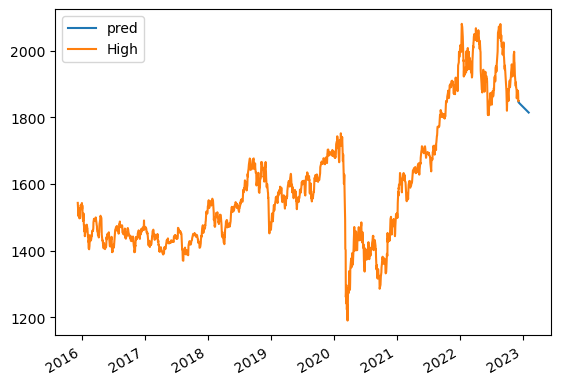

In [ ]:
# examples ! on how to use an arima model 
series_data = yf.download('TA35.TA', start='2015-12-10', end='2022-12-10')
df = create_dataframe_with_series(create_auto_arima_prediction_future_2 , series_data['High'],future = 150)
df.plot()


### How to compare results 
- Regular difference 
- [Relative Difference ](https://en.wikipedia.org/wiki/Relative_change)
$$  \text{Relative change}(v_\text{ref}, v) = \frac{\text{Actual change}}{v_\text{ref}} = \frac{v - v_\text{ref}}{v_\text{ref}} $$

In [ ]:
def show_all_difference(initial_price , final_price,logger=False):
    """Compare the prices via known differences"""
    if logger:
        print("Initial Price is :" , initial_price)
        print("Final Price is :" , final_price)
        print("Buy and hold overall revenue: ",final_price - initial_price) 
        print("Buy and hold relative difference " , (final_price - initial_price) / initial_price)
    return (final_price - initial_price) / initial_price

In [ ]:
show_all_difference(df['High'].dropna().iloc[0] , df['High'].dropna().iloc[-1])

0.1982294302573238

In [ ]:
## Create a recursive function for prediction 

In [ ]:
def get_revenue_arima(func, series_data , future = 30):
    df = create_dataframe_with_series(func , series_data,future = future)
    relative_diff = show_all_difference(df['pred'].dropna().iloc[0] , df['pred'].dropna().iloc[-1])
    return df , relative_diff

[*********************100%%**********************]  1 of 1 completed


<Axes: >

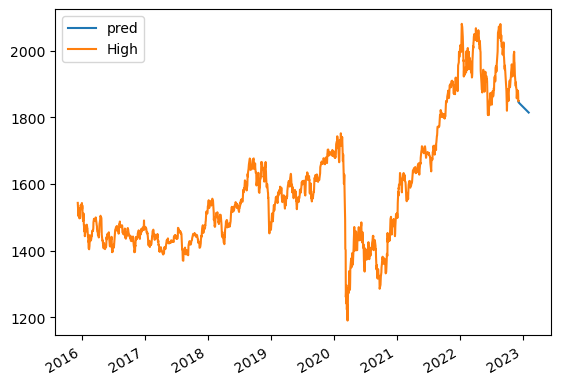

In [ ]:
series_data = yf.download('TA35.TA', start='2015-12-10', end='2022-12-10')

df, relative_diff = get_revenue_arima(create_auto_arima_prediction_future_2 , series_data['High'],future=30)
df.plot()

Relative diff  -0.027518924910823677


<Axes: >

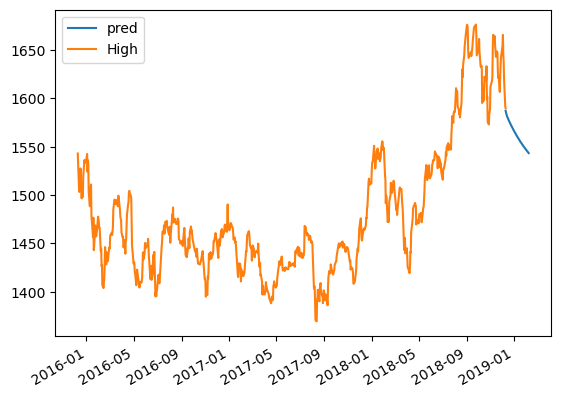

In [ ]:
df , relative_diff = get_revenue_arima(create_auto_arima_prediction_future_2 , series_data['High'].loc[:'2018-12-10'],future=30)
print("Relative diff " , relative_diff)
df.plot()


In [ ]:
#| export 
def strategy_invest(func, series_data , future = 30):
    change_invest_arr = pd.date_range('2017-12-31', freq="M", periods=5*12 -1) # 5 years in months
    capital = 100
    for current_date,next_date in zip(change_invest_arr,change_invest_arr[1:]):
        df , relative_diff = get_revenue_arima(create_auto_arima_prediction_future_2 , series_data.loc[:current_date],future=30)
        real_relative_diff = show_all_difference(series_data.loc[current_date:].iloc[0],series_data.loc[next_date:].iloc[0])
        prev_capital = capital
        if relative_diff > 0:
            capital *= (1+real_relative_diff)
        print("----------------------------------------------------------")
        print("expected relative diff : ", relative_diff)
        print("Da facto Revenue/loss " , capital - prev_capital)
        print("current date : " , current_date)
        print("current capital: " , capital)
    

### Buy and Hold Spec
Here is a tester for buy and hold spec

The selected dates are from '2017-12-31' to date '2022-09-30'

Buy and hold strategy given 100 units it returns **120.3422** 

In [ ]:
show_all_difference(series_data['High'].loc['2017-12-31':].iloc[0],series_data['High'].loc['2022-09-30':].iloc[0])

0.20342226091677398

### Arima Spec
Here is a tester for arima prediction 

The selected dates are from '2017-12-31' to date '2022-09-30'

Arima prediction operate: given 100 units it returns  **121.00688735284602**

In [ ]:
#| hide 
strategy_invest(create_auto_arima_prediction_future_2 , series_data['High'])

----------------------------------------------------------
expected relative diff :  -0.034462373902034715
Da facto Revenue/loss  0
current date :  2017-12-31 00:00:00
current capital:  100
----------------------------------------------------------
expected relative diff :  -0.04789103194377278
Da facto Revenue/loss  0
current date :  2018-01-31 00:00:00
current capital:  100
----------------------------------------------------------
expected relative diff :  -0.02757677059917136
Da facto Revenue/loss  0
current date :  2018-02-28 00:00:00
current capital:  100
----------------------------------------------------------
expected relative diff :  0.007323295231201468
Da facto Revenue/loss  2.0166798597283275
current date :  2018-03-31 00:00:00
current capital:  102.01667985972833
----------------------------------------------------------
expected relative diff :  -0.0093366759450998
Da facto Revenue/loss  0.0
current date :  2018-04-30 00:00:00
current capital:  102.01667985972833
------

In [ ]:
#| hide
def date_generator(date):
    """ 
    Given string of "Y-M-D"
    Returns an array of [year , month ,day]
    """
    arr = date.split("-")
    arr = [int(elem) for elem in arr]
    while True:
        yield '-'.join([str(elem) for elem in arr])
        arr[2] += 1 
        if arr[2] > 30:
            arr[2] -= 30
            arr[1] += 1
        if arr[1] > 12:
            arr[1] -= 12
            arr[0] += 1
        print(arr)
        
    

In [ ]:
#| hide
genera = date_generator('2018-12-10')
next(genera)


In [ ]:
#| hide 
for a in range(10):
    print(next(genera))

In [ ]:
#| hide 
series_data.index[0]
barak= pd.Series(pd.date_range('2017-12-31', freq="M", periods=30)) # "1/1/2011"
barak =pd.date_range('2017-12-31', freq="M", periods=30)
for i in barak[1:3]:
    print(series_data.loc[i:])
#series_data.index
#series_data.loc[barak[1]:]

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()